In [15]:
require(data.table)
require(ggplot2)
require(tidyr)
require(RColorBrewer)
options(repr.plot.width=20, repr.plot.height=15)

Loading required package: tidyr



In [30]:
covper=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/coverage_percent.csv")
covabs=read.csv("~/Documents/Lenfest/Plot_CSV_v2/Coverage_absolute.csv")
depth=read.csv("~/Documents/Lenfest/MPA_Gaps_Overview_Figure_CSV/depth_coverage_bray_curtis_index.csv")
region=read.csv("~/Documents/Lenfest/Plot_CSV_v2/Regions.csv")

In [45]:
covperr=merge(covper, region, by=c("Ecoregion_ID", "NAME"))
covpabsr=merge(covabs, region, by=c("Ecoregion_ID", "NAME"))

In [35]:
head(covperr)

,Ecoregion_ID,NAME,Percent,PA,Region
,<int>,<chr>,<dbl>,<chr>,<chr>
1,1,Acadian Atlantic,4.782362266,MPA,East Coast
2,1,Acadian Atlantic,0.005173248,FPA,East Coast
3,10,Columbian Pacific,2.341204026,MPA,West Coast
4,10,Columbian Pacific,0.036241224,FPA,West Coast
5,11,Guam and Mariannas,25.511511700,MPA,Pacific Islands
6,11,Guam and Mariannas,0.000876038,FPA,Pacific Islands


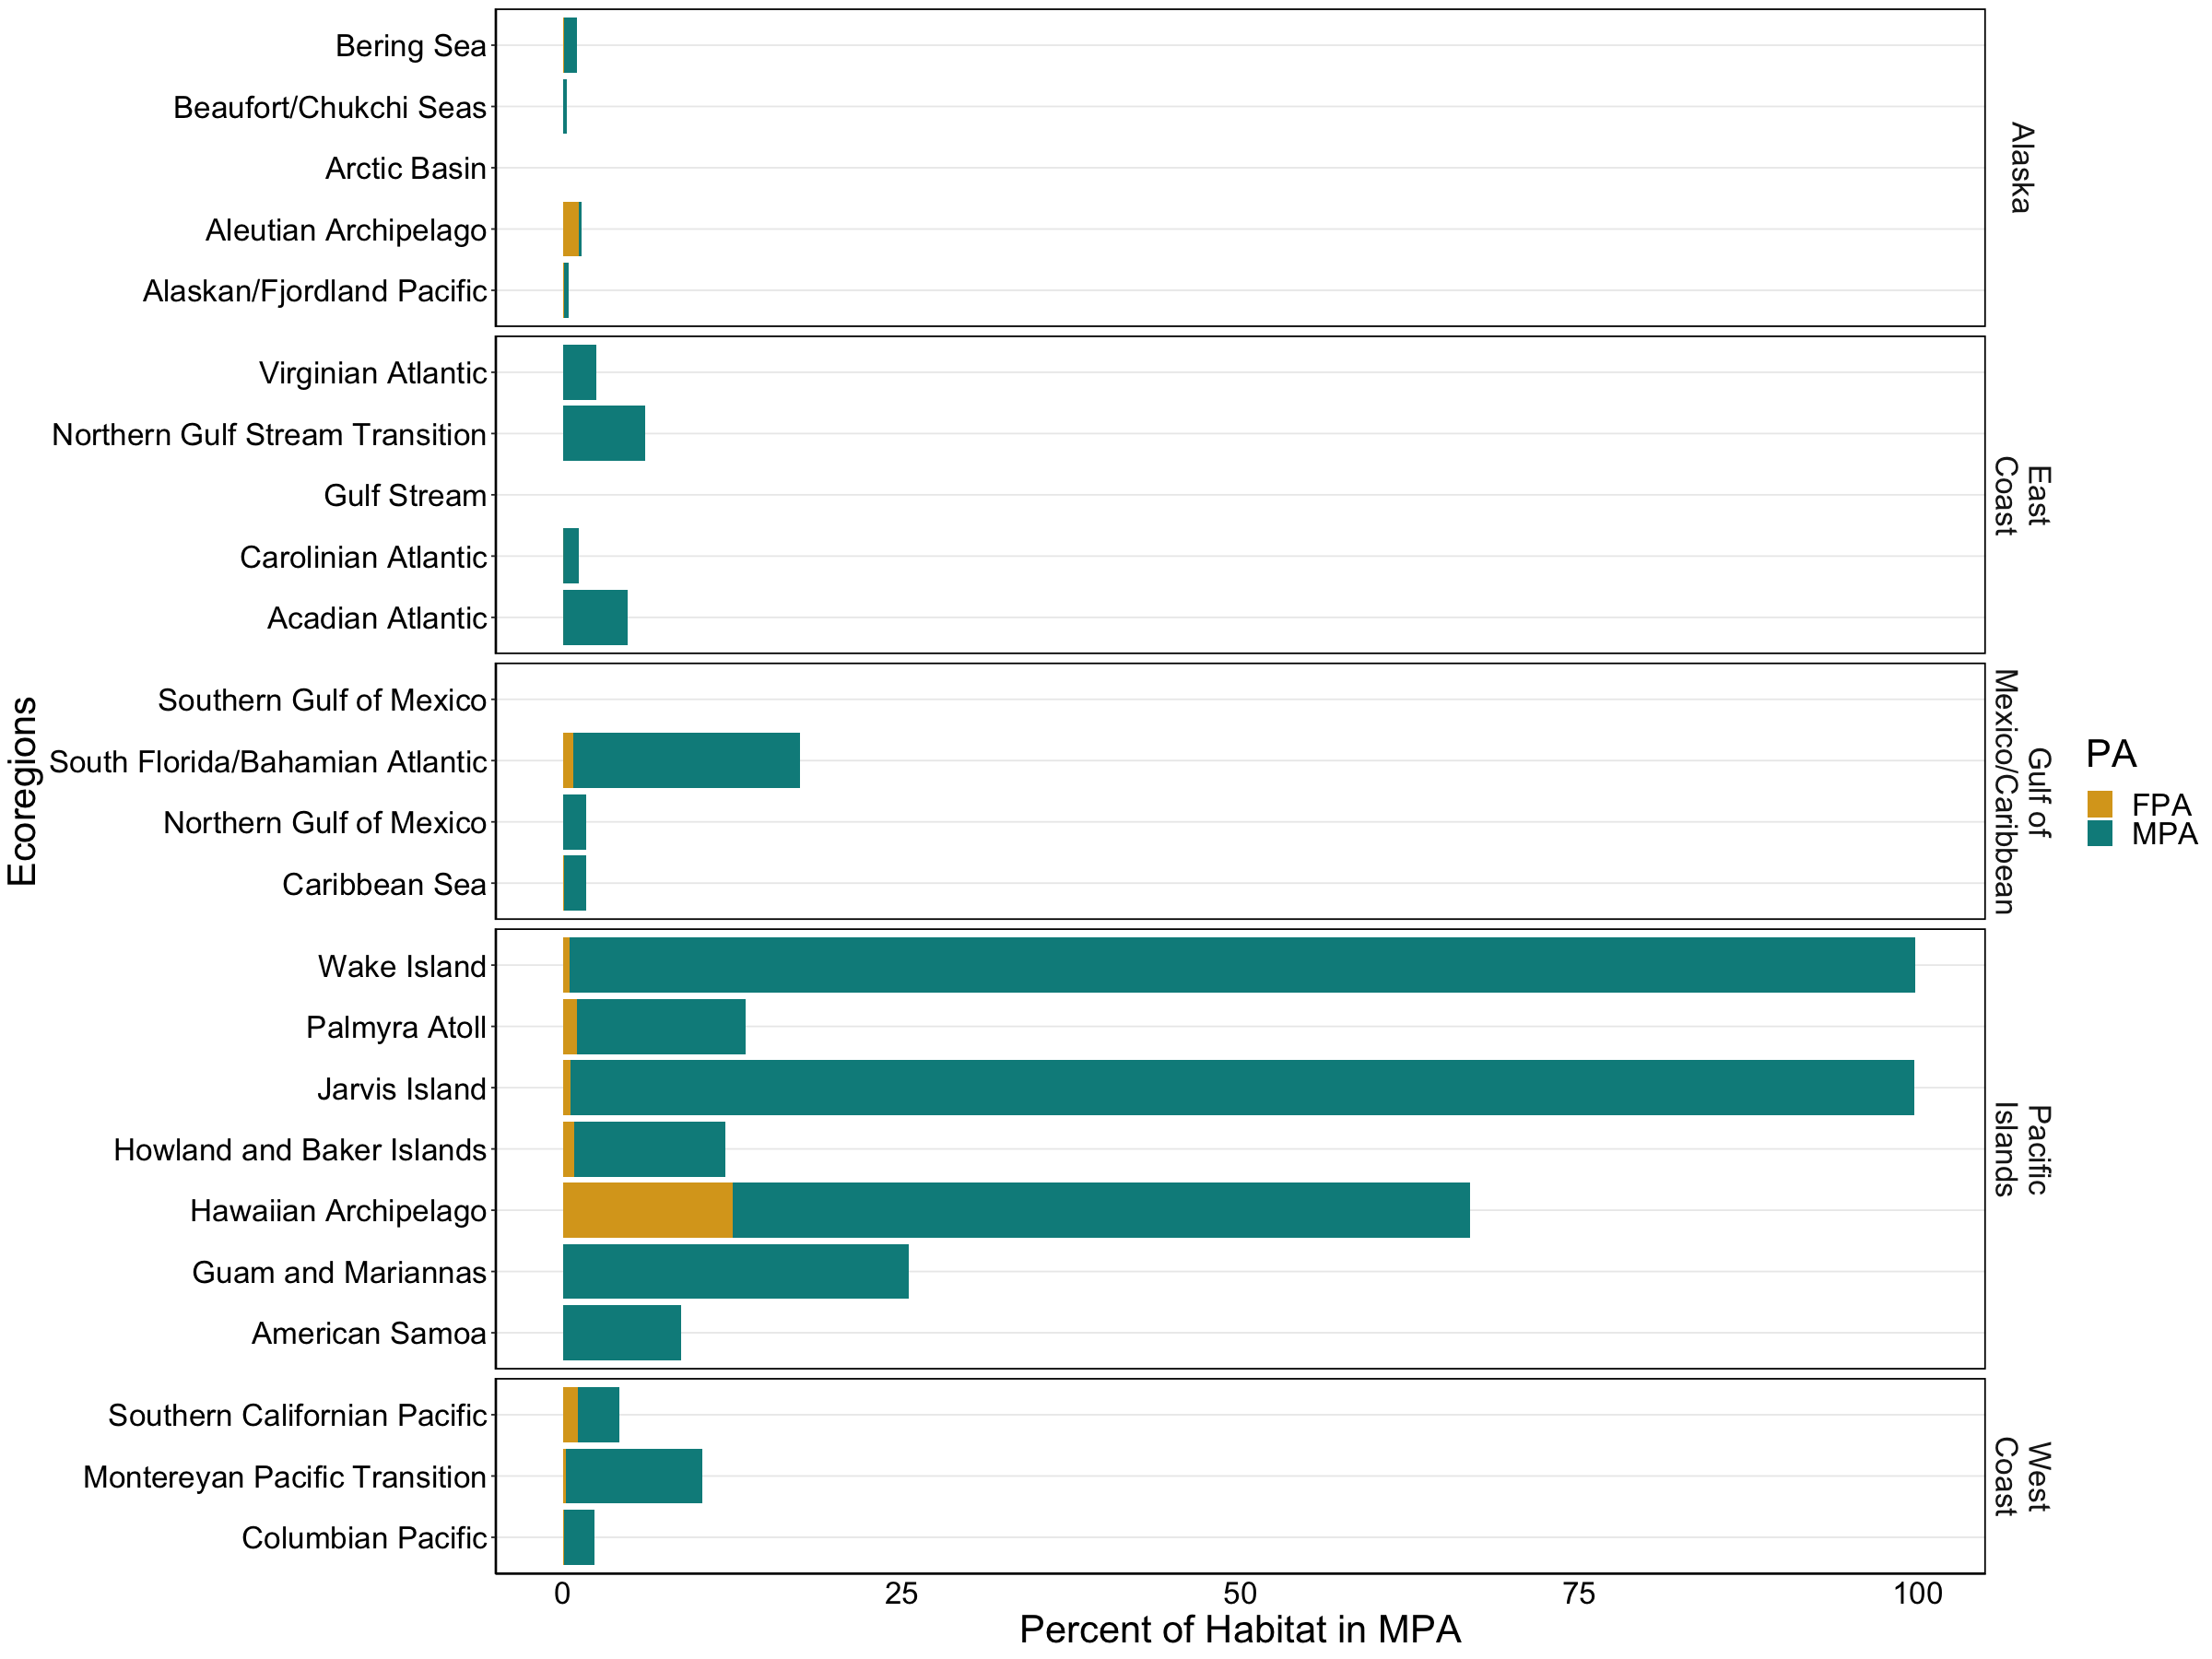

In [38]:
ggplot(covperr, aes(y=NAME, x=Percent)) +
geom_bar(position="identity", stat="identity", aes(fill=PA ))+
scale_fill_manual(values=c("goldenrod", "cyan4"))+
facet_grid(Region~., scales="free", space="free",    labeller = labeller(Region = label_wrap_gen(10)))+
theme_bw()+
labs(x="Percent of Habitat in MPA", shape="", size="Percent of ER")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          panel.border=element_rect(colour="black",size=1),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25),
          strip.background = element_blank())+
    xlim(0,100)+
#coord_flip()+
ylab("Ecoregions")

In [40]:
ggsave(file="~/Documents/Lenfest/FigureS10_per.pdf", width=15, height=10)

In [41]:
head(covpabsr)

,Ecoregion_ID,NAME,ER_Area,MPA_Area,FPA_Area,Region
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<chr>
1,1,Acadian Atlantic,100762.2,4818.811,5.212676e+00,East Coast
2,10,Columbian Pacific,445698.9,10434.721,1.615267e+02,West Coast
3,11,Guam and Mariannas,974230.3,248540.868,8.534623e+00,Pacific Islands
4,12,Gulf Stream,308597.6,0.000,0.000000e+00,East Coast
5,13,Hawaiian Archipelago,2923629.4,1956311.915,3.660015e+05,Pacific Islands
6,14,Howland and Baker Islands,435165.5,52000.447,3.404044e+03,Pacific Islands


In [46]:
covpabsr=pivot_longer(covpabsr,
  cols=c('ER_Area','MPA_Area', 'FPA_Area'),
  values_to = "area"
         )

In [47]:
covpabsr

Ecoregion_ID,NAME,Region,name,area
<int>,<chr>,<chr>,<chr>,<dbl>
1,Acadian Atlantic,East Coast,ER_Area,1.007622e+05
1,Acadian Atlantic,East Coast,MPA_Area,4.818811e+03
1,Acadian Atlantic,East Coast,FPA_Area,5.212676e+00
10,Columbian Pacific,West Coast,ER_Area,4.456989e+05
10,Columbian Pacific,West Coast,MPA_Area,1.043472e+04
10,Columbian Pacific,West Coast,FPA_Area,1.615267e+02
11,Guam and Mariannas,Pacific Islands,ER_Area,9.742303e+05
11,Guam and Mariannas,Pacific Islands,MPA_Area,2.485409e+05
11,Guam and Mariannas,Pacific Islands,FPA_Area,8.534623e+00


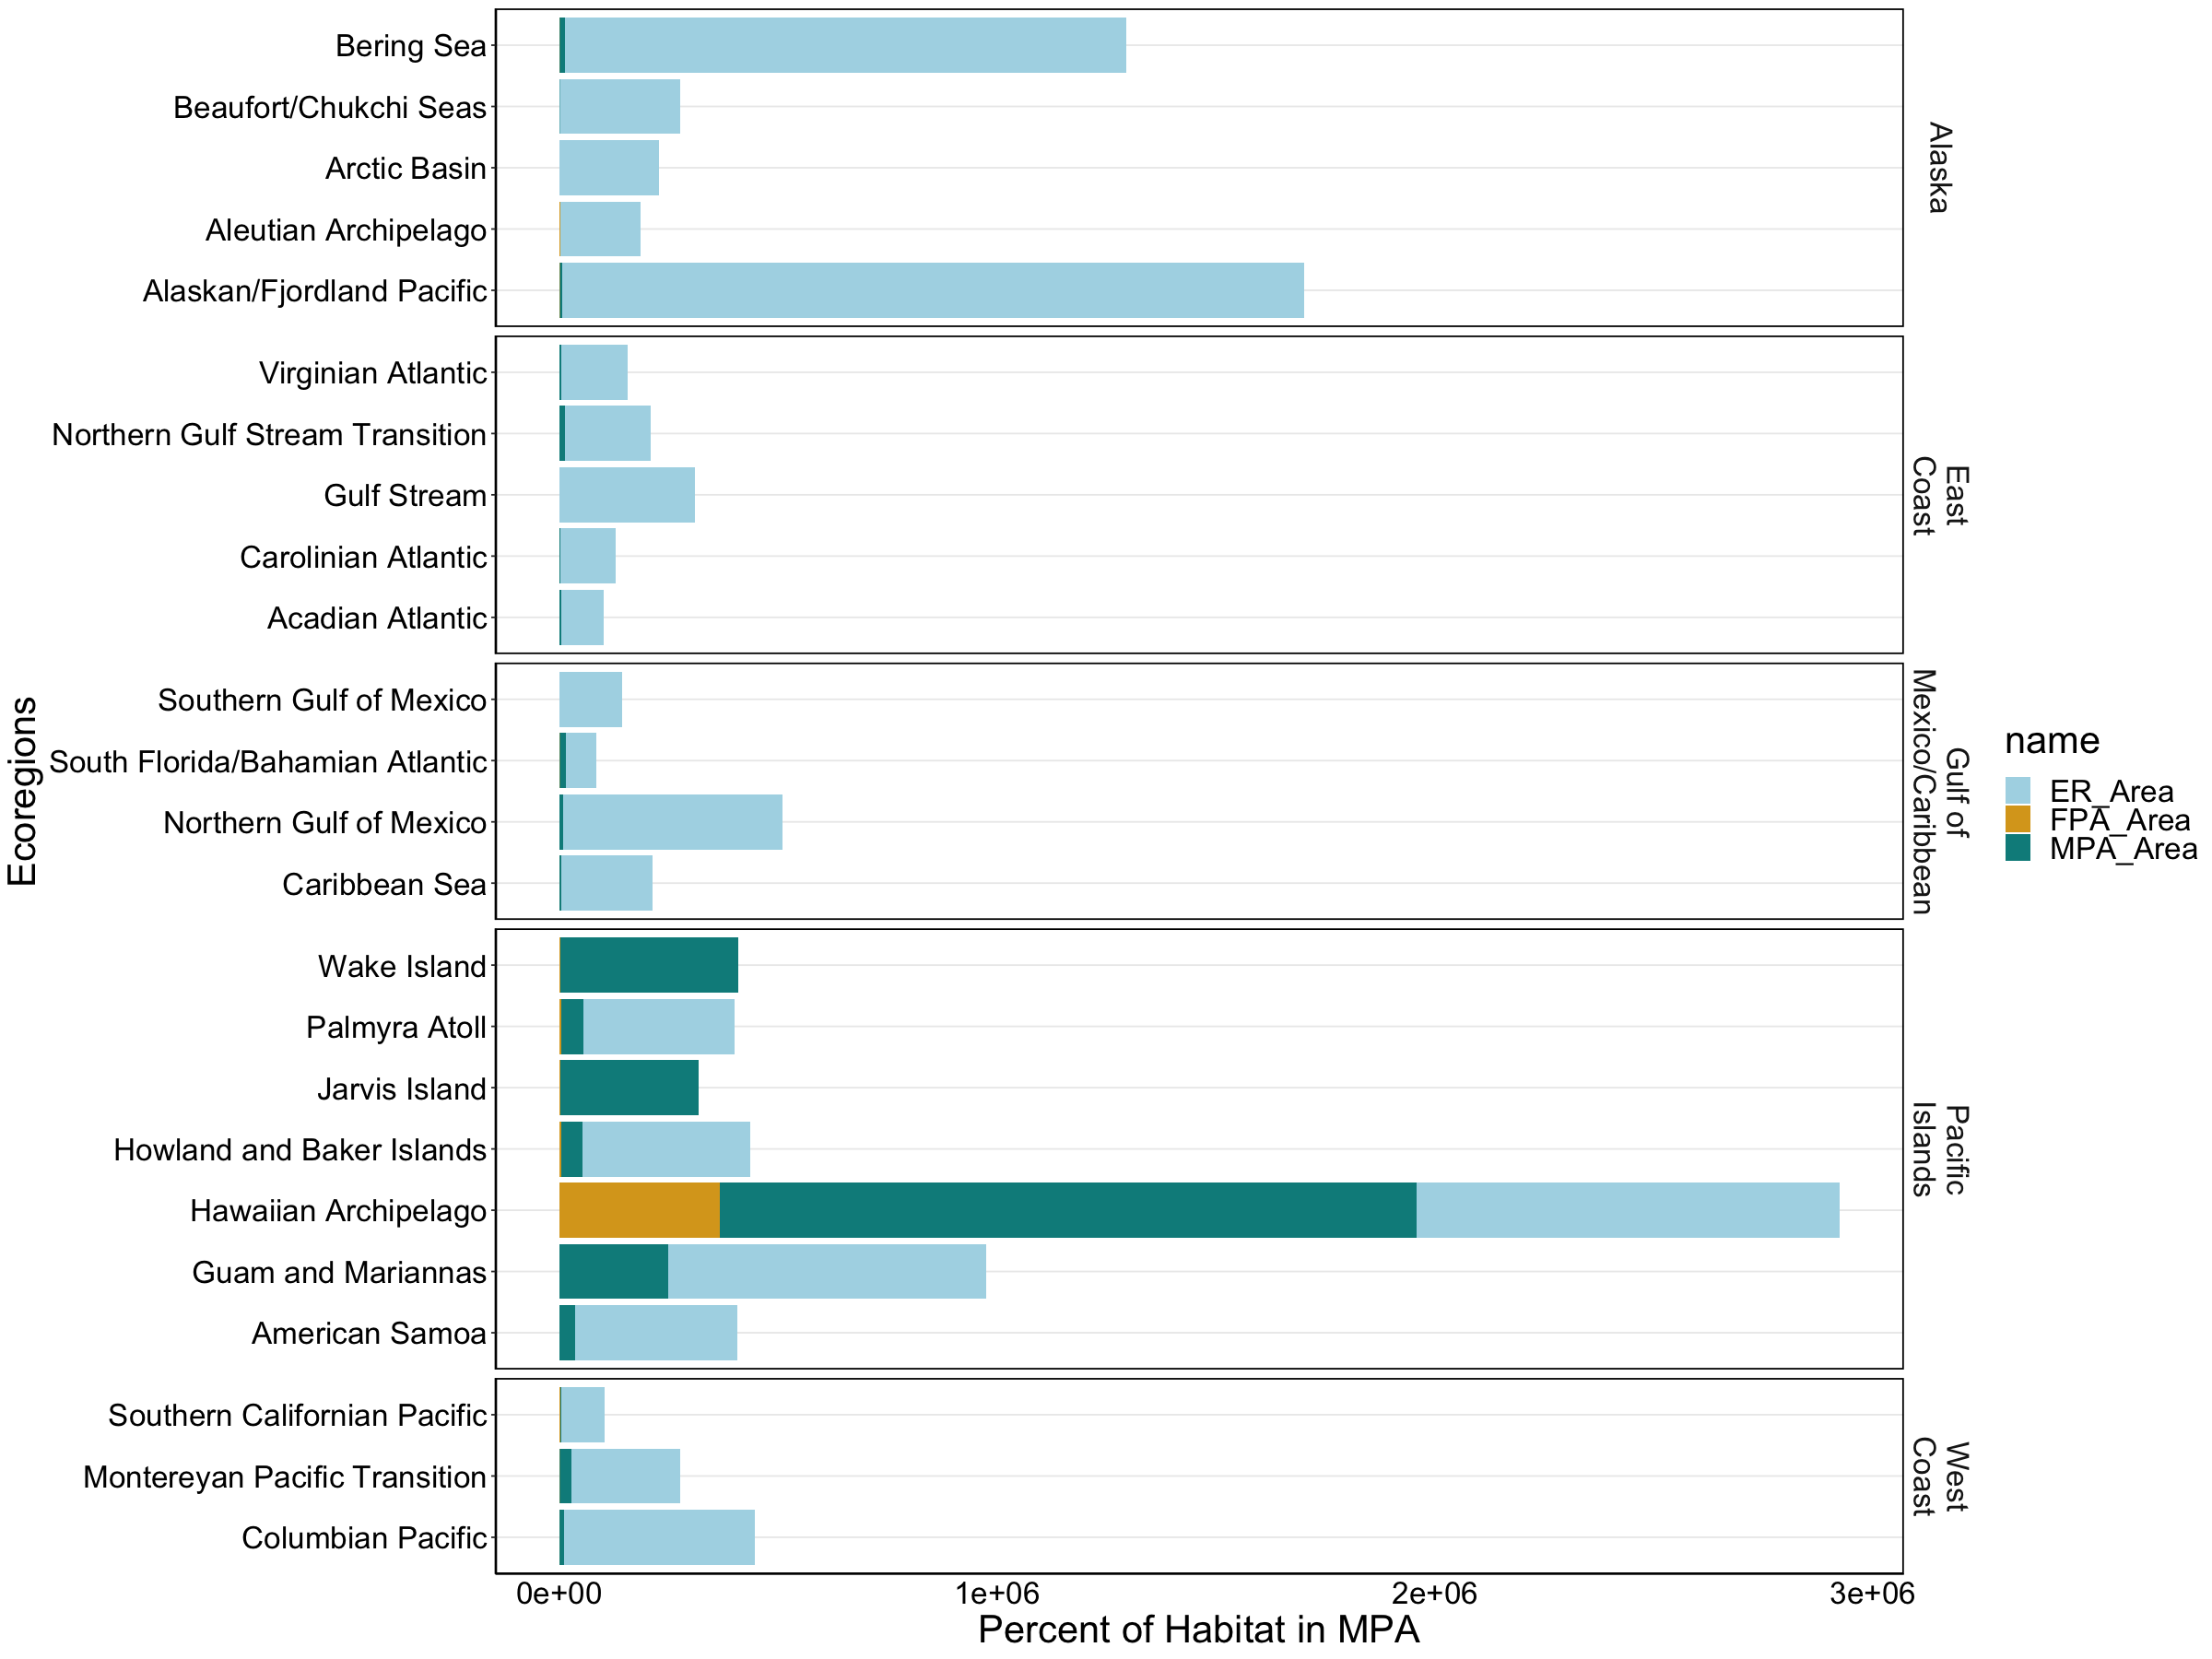

In [52]:
ggplot(covpabsr, aes(y=NAME, x=area)) +
geom_bar(position="identity", stat="identity", aes(fill=name ))+
scale_fill_manual(values=c("lightblue","goldenrod", "cyan4"))+
facet_grid(Region~., scales="free", space="free",    labeller = labeller(Region = label_wrap_gen(10)))+
theme_bw()+
labs(x="Percent of Habitat in MPA", shape="", size="Percent of ER")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          panel.border=element_rect(colour="black",size=1),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25),
          strip.background = element_blank())+
#coord_flip()+
ylab("Ecoregions")

In [53]:
ggsave(file="~/Documents/Lenfest/FigureS10_abs.pdf", width=15, height=10)

In [11]:
depthr=merge(depth, region, by="Ecoregion_ID")

In [17]:
depthr=pivot_longer(depthr,
  cols=c('MPA_BrayCurtis','FPA_BrayCurtis'),
  values_to = "BrayCurtis"
         )

In [18]:
depthr

Ecoregion_ID,Depth_Mean_Diff,NAME,Region,name,BrayCurtis
<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>
1,72.7783966,Acadian Atlantic,East Coast,MPA_BrayCurtis,0.090558310
1,72.7783966,Acadian Atlantic,East Coast,FPA_BrayCurtis,0.000219558
2,3401.4445800,Alaskan/Fjordland Pacific,Alaska,MPA_BrayCurtis,0.008396265
2,3401.4445800,Alaskan/Fjordland Pacific,Alaska,FPA_BrayCurtis,0.001156148
3,879.0204468,Aleutian Archipelago,Alaska,MPA_BrayCurtis,0.024935647
3,879.0204468,Aleutian Archipelago,Alaska,FPA_BrayCurtis,0.022416686
4,-54.8681641,American Samoa,Pacific Islands,MPA_BrayCurtis,0.160309434
4,-54.8681641,American Samoa,Pacific Islands,FPA_BrayCurtis,0.000022600
5,NA,Arctic Basin,Alaska,MPA_BrayCurtis,0.000000000


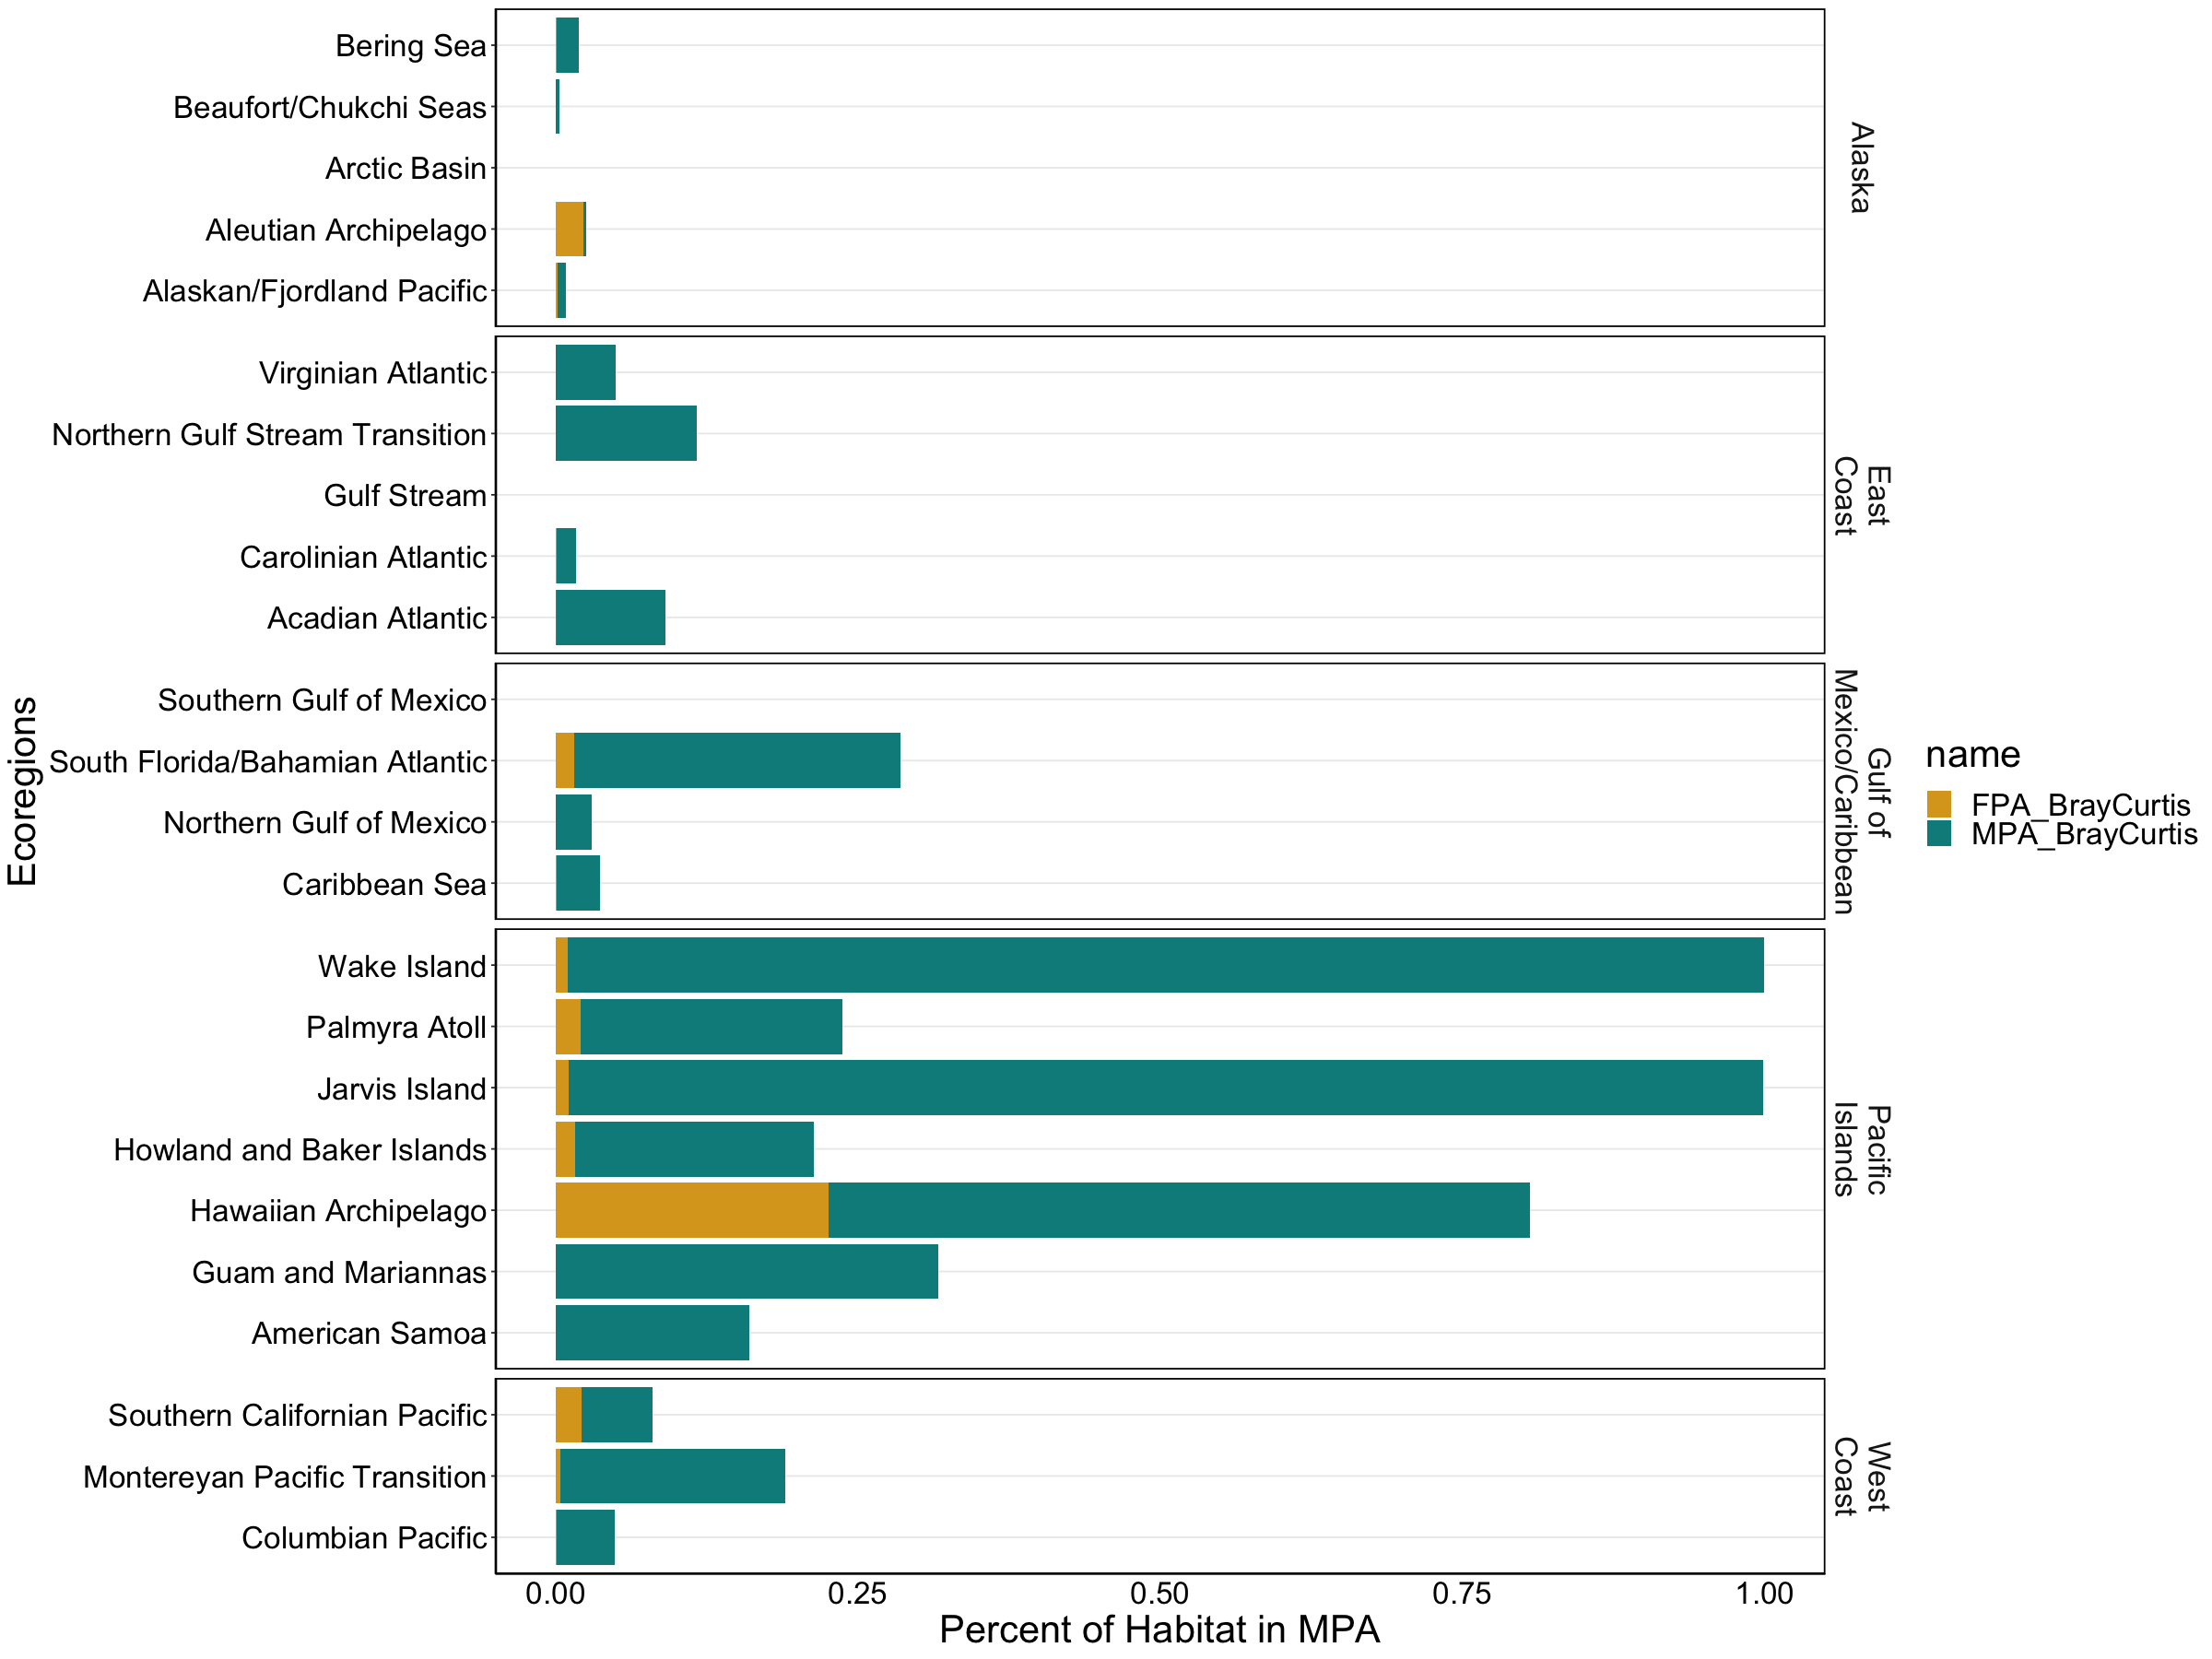

In [20]:
ggplot(depthr, aes(y=NAME, x=BrayCurtis)) +
geom_bar(position="identity", stat="identity", aes(fill=name ))+
scale_fill_manual(values=c("goldenrod", "cyan4"))+
facet_grid(Region~., scales="free", space="free",    labeller = labeller(Region = label_wrap_gen(10)))+
theme_bw()+
labs(x="Percent of Habitat in MPA", shape="", size="Percent of ER")+
theme(legend.position="right",  
          panel.grid.major.x = element_blank(), 
          panel.grid.minor.x = element_blank(),
          panel.border=element_rect(colour="black",size=1),
          axis.ticks.x=element_blank(), 
          axis.line=element_line(color="black"), axis.text=element_text(color="black"),
          text = element_text(size=25),
          strip.background = element_blank())+
    xlim(0,1)+
#coord_flip()+
ylab("Ecoregions")

In [21]:
ggsave(file="~/Documents/Lenfest/FigureS11_depth.pdf", width=15, height=10)